In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
import env
import scipy.stats as stats

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.

Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [2]:
df = wrangle.wrangle_zillow()

/Users/dashiellbringhurst/codeup-data-science/clustering-exercises/wrangle.py:72: DtypeWarning: Columns (8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('zillow.csv', index_col=0)


In [3]:
df

,id,parcelid,logerror,transactiondate,airconditioningtypeid,airconditioningdesc,architecturalstyletypeid,architecturalstyledesc,basementsqft,bathroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0,10754147,0.025595,2017-01-01,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,1,10759547,0.055619,2017-01-01,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,2,10843547,0.005383,2017-01-01,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,3,10859147,-0.103410,2017-01-01,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,4,10879947,0.006940,2017-01-01,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77609,77609,11212539,0.020615,2017-09-20,1.0,Central,NaN,NaN,NaN,3.0,...,NaN,NaN,129566.0,162019.0,2016.0,32453.0,2860.33,NaN,NaN,6.037911e+13
77610,77610,11212639,0.013209,2017-09-21,1.0,Central,NaN,NaN,NaN,3.0,...,NaN,NaN,100744.0,125923.0,2016.0,25179.0,2394.26,NaN,NaN,6.037911e+13
77611,77611,11212962,0.037129,2017-09-21,1.0,Central,NaN,NaN,NaN,2.0,...,NaN,NaN,149241.0,198988.0,2016.0,49747.0,3331.81,NaN,NaN,6.037911e+13
77612,77612,11213162,0.007204,2017-09-25,1.0,Central,NaN,NaN,NaN,3.0,...,NaN,NaN,118900.0,148600.0,2016.0,29700.0,2510.53,NaN,NaN,6.037911e+13


In [4]:
wrangle.nulls_by_row(df)

,num_cols_missing,percent_cols_missing,index
0,23,35.9375,13
1,24,37.5000,26
2,25,39.0625,164
3,26,40.6250,349
4,27,42.1875,4308
5,28,43.7500,2883
6,29,45.3125,8981
7,30,46.8750,11552
8,31,48.4375,15186
9,32,50.0000,15433


In [5]:
wrangle.nulls_by_col(df)

,num_rows_missing,percent_rows_missing,count
0,0,0.000000,12
1,1,0.001288,2
2,275,0.354318,1
3,511,0.658386,1
4,925,1.191795,1
5,1112,1.432731,1
6,1170,1.507460,1
7,1265,1.629861,1
8,1526,1.966140,1
9,1611,2.075656,1


In [6]:
wrangle.summarize(df)

DataFrame head: 

   id  parcelid  logerror transactiondate  airconditioningtypeid  \
0   0  10754147  0.025595      2017-01-01                    NaN   
1   1  10759547  0.055619      2017-01-01                    NaN   
2   2  10843547  0.005383      2017-01-01                    NaN   
3   3  10859147 -0.103410      2017-01-01                    NaN   
4   4  10879947  0.006940      2017-01-01                    NaN   

  airconditioningdesc  architecturalstyletypeid architecturalstyledesc  \
0                 NaN                       NaN                    NaN   
1                 NaN                       NaN                    NaN   
2                 NaN                       NaN                    NaN   
3                 NaN                       NaN                    NaN   
4                 NaN                       NaN                    NaN   

   basementsqft  bathroomcnt  ...  numberofstories  fireplaceflag  \
0           NaN          0.0  ...              NaN         

Nulls by row:      num_cols_missing  percent_cols_missing  index
0                 23               35.9375     13
1                 24               37.5000     26
2                 25               39.0625    164
3                 26               40.6250    349
4                 27               42.1875   4308
5                 28               43.7500   2883
6                 29               45.3125   8981
7                 30               46.8750  11552
8                 31               48.4375  15186
9                 32               50.0000  15433
10                33               51.5625   5682
11                34               53.1250   6030
12                35               54.6875   2861
13                36               56.2500   1383
14                37               57.8125    296
15                38               59.3750    297
16                39               60.9375     71
17                40               62.5000     63
18                41               

(1807.791, 1828.8]        1
(1828.8, 1849.6]          0
(1849.6, 1870.4]          2
(1870.4, 1891.2]         41
(1891.2, 1912.0]       1224
(1912.0, 1932.8]       6488
(1932.8, 1953.6]      16309
(1953.6, 1974.4]      25672
(1974.4, 1995.2]      18467
(1995.2, 2016.0]       8240
Name: yearbuilt, dtype: int64
-----
(0.996, 1.3]    11266
(1.3, 1.6]          0
(1.6, 1.9]          0
(1.9, 2.2]       6445
(2.2, 2.5]          0
(2.5, 2.8]          0
(2.8, 3.1]        402
(3.1, 3.4]          0
(3.4, 3.7]          0
(3.7, 4.0]          6
Name: numberofstories, dtype: int64
-----
(0.9989, 0.9992]      0
(0.9992, 0.9994]      0
(0.9994, 0.9996]      0
(0.9996, 0.9998]      0
(0.9998, 1.0]       125
(1.0, 1.0002]         0
(1.0002, 1.0004]      0
(1.0004, 1.0006]      0
(1.0006, 1.0008]      0
(1.0008, 1.001]       0
Name: fireplaceflag, dtype: int64
-----
(-66399.928, 6640497.7]     76332
(6640497.7, 13280990.4]        11
(13280990.4, 19921483.1]        4
(19921483.1, 26561975.8]        0
(26561

In [7]:
df = wrangle.handle_missing_values(df, prop_required_columns=0.5, prop_required_row=0.75)

In [8]:
df = wrangle.add_upper_outlier_columns(df, k=1.5)

In [9]:
wrangle.summarize(df)

DataFrame head: 

   id  parcelid  logerror transactiondate  bathroomcnt  bedroomcnt  \
2   2  10843547  0.005383      2017-01-01          0.0         0.0   
3   3  10859147 -0.103410      2017-01-01          0.0         0.0   
4   4  10879947  0.006940      2017-01-01          0.0         0.0   
5   5  10898347 -0.020526      2017-01-01          0.0         0.0   
7   7  10940747  0.101723      2017-01-01          0.0         0.0   

   buildingqualitytypeid  calculatedbathnbr  calculatedfinishedsquarefeet  \
2                    NaN                NaN                       73026.0   
3                    6.0                NaN                        5068.0   
4                    NaN                NaN                        1776.0   
5                    4.0                NaN                        2400.0   
7                    NaN                NaN                        3611.0   

   finishedsquarefeet12  ...  regionidzip_upper_outliers  \
2                   NaN  ...          

Nulls by row:      num_cols_missing  percent_cols_missing  index
0                  0              0.000000  43424
1                  1              1.666667    101
2                  2              3.333333   3193
3                  3              5.000000    657
4                  4              6.666667    276
5                  5              8.333333   3037
6                  6             10.000000     65
7                  7             11.666667   1065
8                  8             13.333333  18353
9                  9             15.000000    107
10                10             16.666667   4108
11                11             18.333333    181
12                12             20.000000    537
13                13             21.666667    169
14                14             23.333333     72
15                15             25.000000     85
----------
Value counts: 

(-75.61200000000001, 7763.1]    7496
(7763.1, 15524.2]               7428
(15524.2, 23285.3]              77

(-0.002, -0.0008]         0
(-0.0008, -0.0006]        0
(-0.0006, -0.0004]        0
(-0.0004, -0.0002]        0
(-0.0002, 0.0]        75319
(0.0, 0.0002]             0
(0.0002, 0.0004]          0
(0.0004, 0.0006]          0
(0.0006, 0.0008]          0
(0.0008, 0.001]           0
Name: yearbuilt_upper_outliers, dtype: int64
-----
(-16495.001, 1649500.038]       75197
(1649500.038, 3299000.075]         90
(3299000.075, 4948500.113]         22
(4948500.113, 6598000.15]           2
(6598000.15, 8247500.188]           5
(8247500.188, 9897000.225]          1
(9897000.225, 11546500.263]         1
(11546500.263, 13196000.3]          1
(13196000.3, 14845500.338]          1
(14845500.338, 16495000.375]        2
Name: structuretaxvaluedollarcnt_upper_outliers, dtype: int64
-----
(-29164.312, 2916431.088]       75152
(2916431.088, 5832862.175]        204
(5832862.175, 8749293.262]         41
(8749293.262, 11665724.35]         13
(11665724.35, 14582155.438]         5
(14582155.438, 17498586.525]   

In [10]:
df = df.dropna()

In [11]:
df

,id,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,regionidzip_upper_outliers,roomcnt_upper_outliers,unitcnt_upper_outliers,yearbuilt_upper_outliers,structuretaxvaluedollarcnt_upper_outliers,taxvaluedollarcnt_upper_outliers,assessmentyear_upper_outliers,landtaxvaluedollarcnt_upper_outliers,taxamount_upper_outliers,censustractandblock_upper_outliers
1287,1287,10717217,0.012474,2017-01-06,2.0,3.0,8.0,2.0,1766.0,1766.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288,1288,10718048,0.053889,2017-01-06,3.0,5.0,9.0,3.0,3085.0,3085.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1289,1289,10718101,-0.420413,2017-01-06,3.0,5.0,8.0,3.0,2401.0,2401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1290,1290,10718224,0.005598,2017-01-06,3.0,4.0,7.0,3.0,2397.0,2397.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1291,1291,10718347,-0.094197,2017-01-06,3.0,4.0,7.0,3.0,2574.0,2574.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77609,77609,11212539,0.020615,2017-09-20,3.0,4.0,8.0,3.0,1921.0,1921.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77610,77610,11212639,0.013209,2017-09-21,3.0,4.0,8.0,3.0,1780.0,1780.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77611,77611,11212962,0.037129,2017-09-21,2.0,3.0,6.0,2.0,1549.0,1549.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77612,77612,11213162,0.007204,2017-09-25,3.0,3.0,8.0,3.0,1339.0,1339.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Is the data evenly distributed?

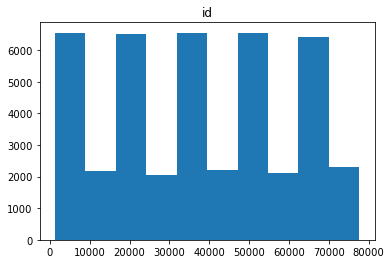

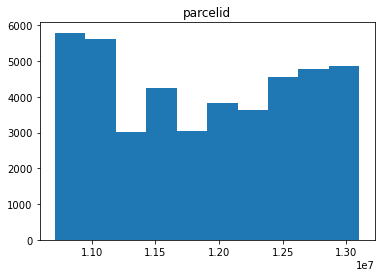

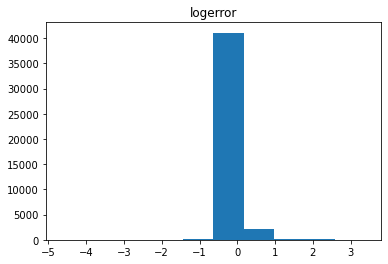

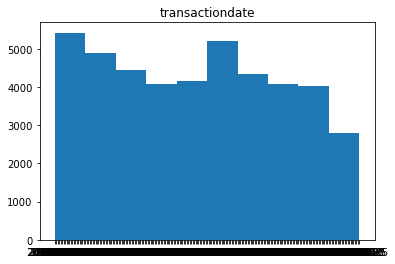

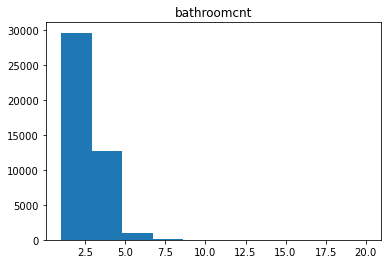

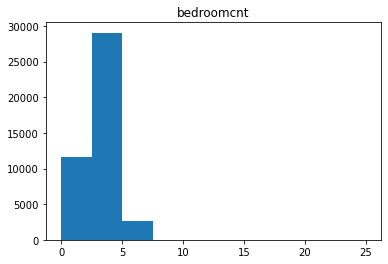

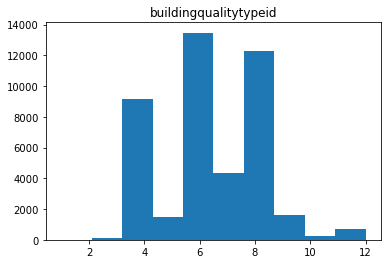

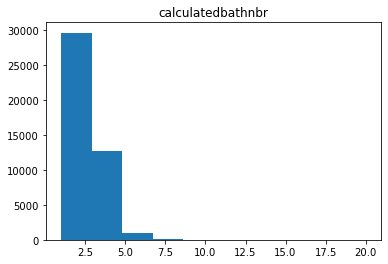

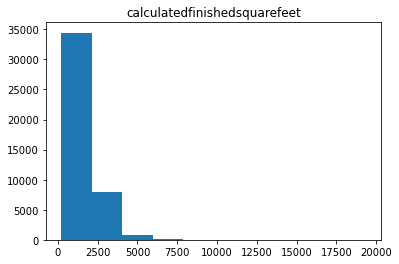

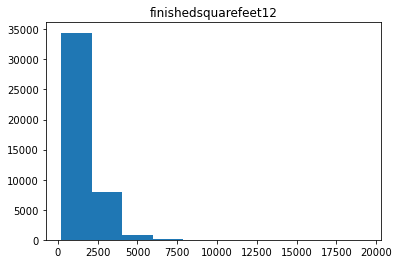

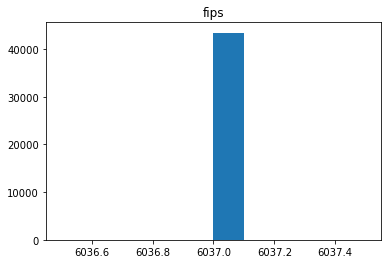

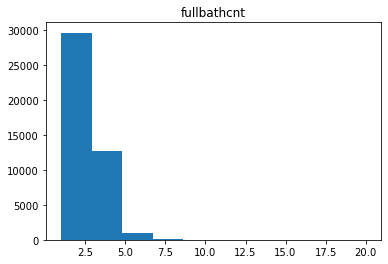

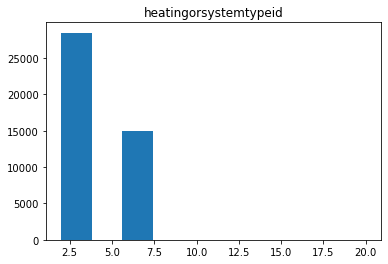

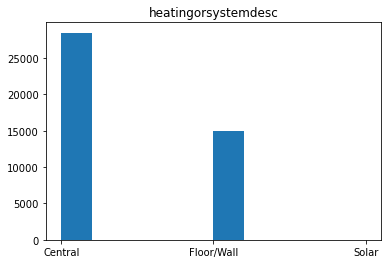

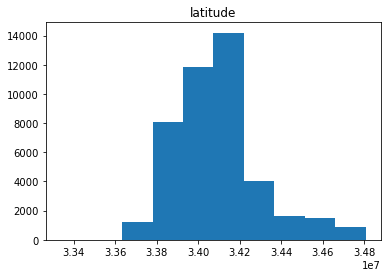

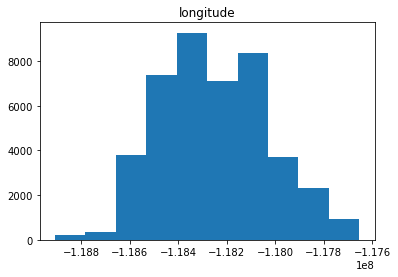

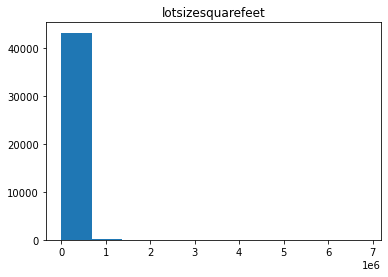

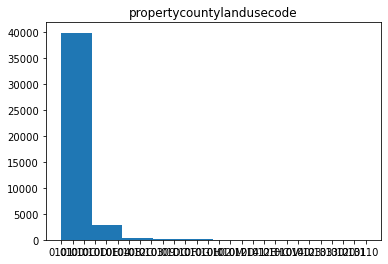

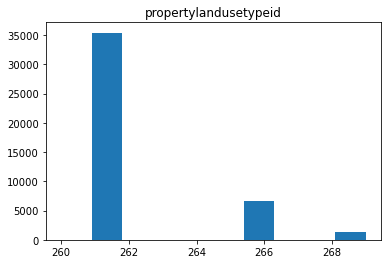

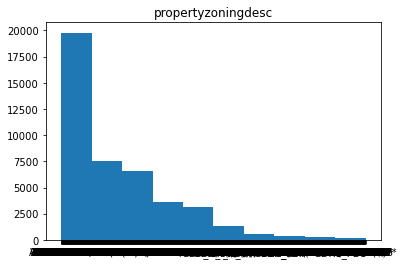

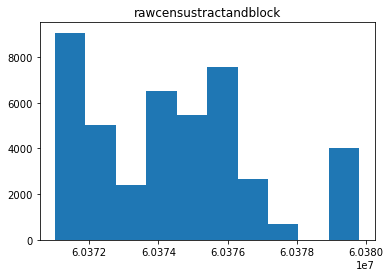

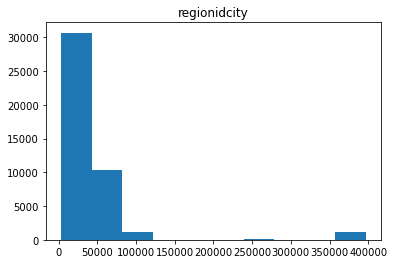

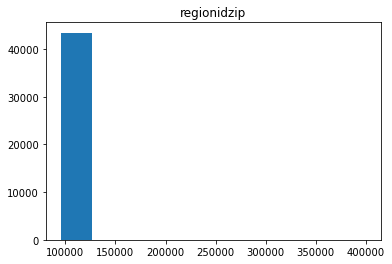

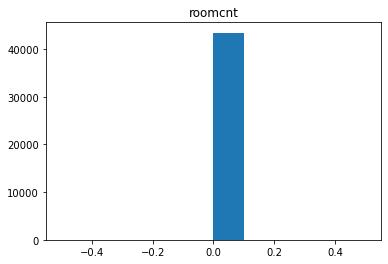

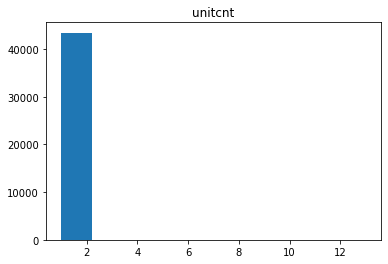

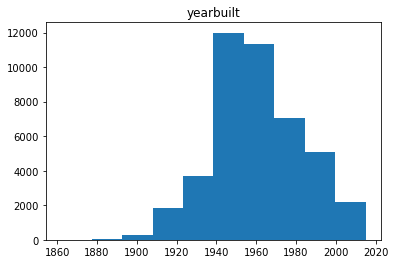

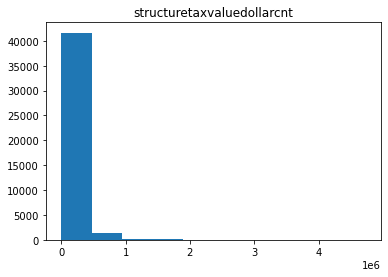

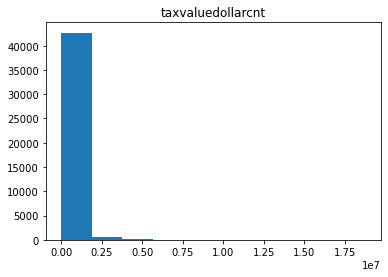

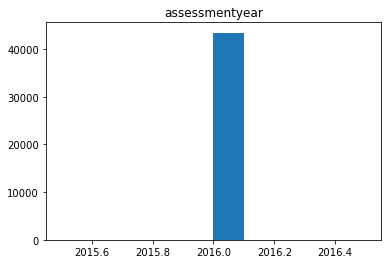

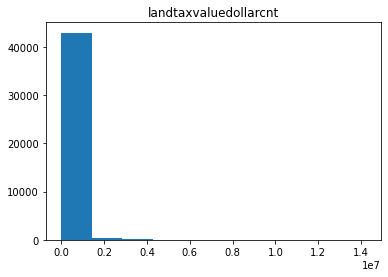

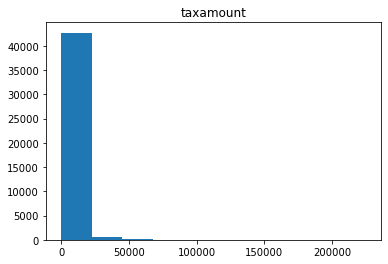

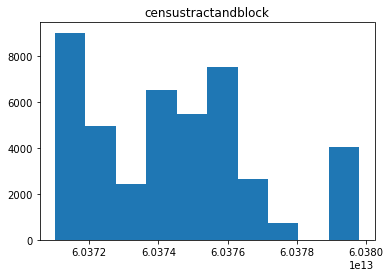

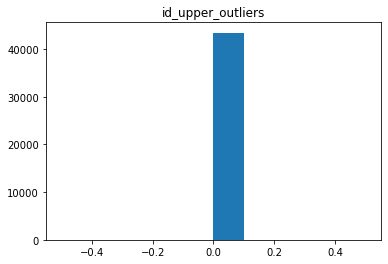

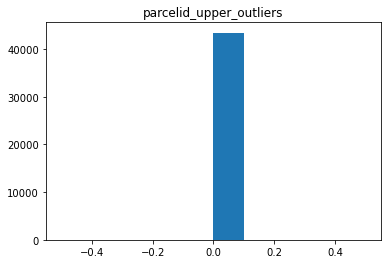

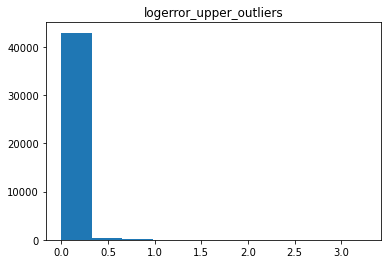

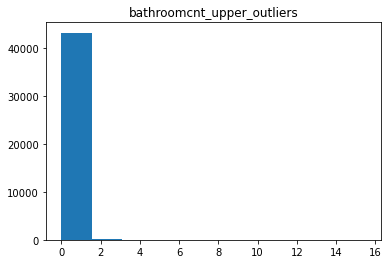

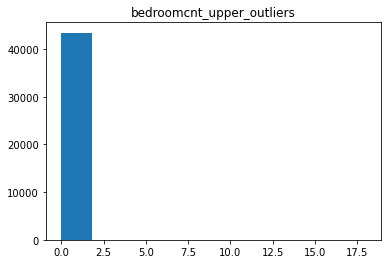

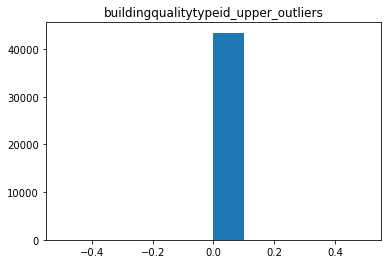

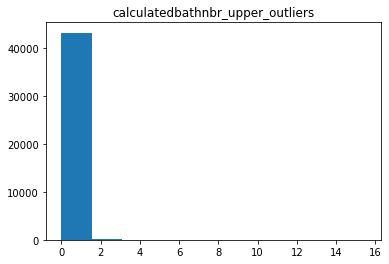

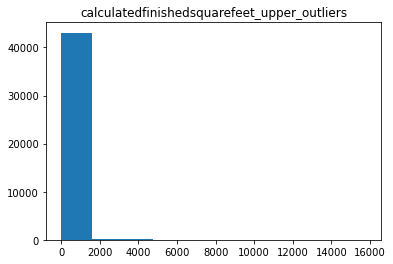

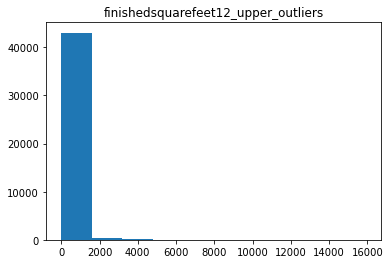

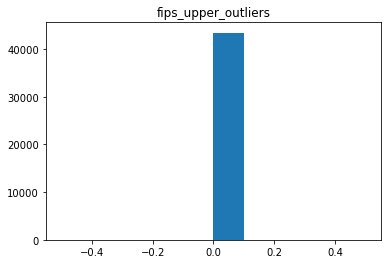

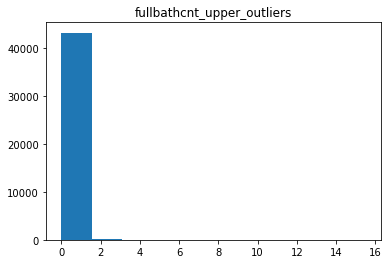

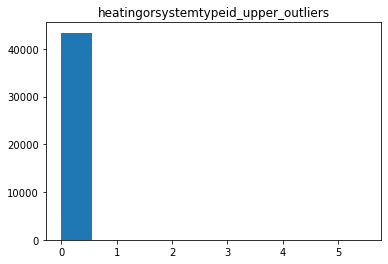

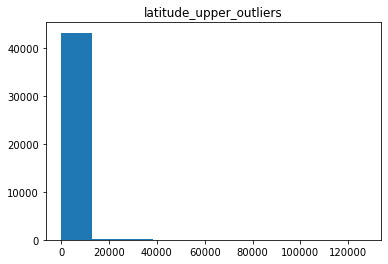

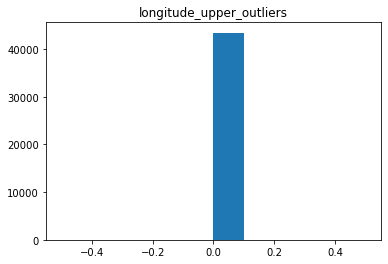

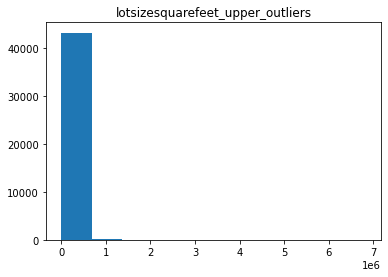

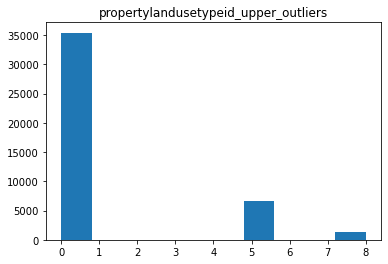

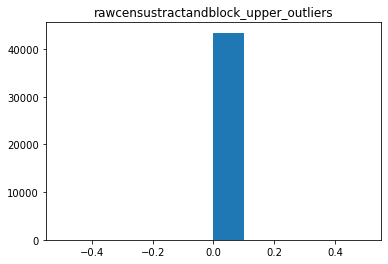

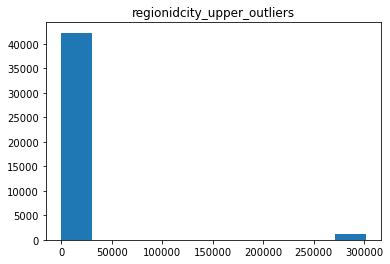

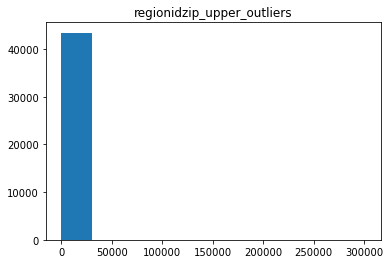

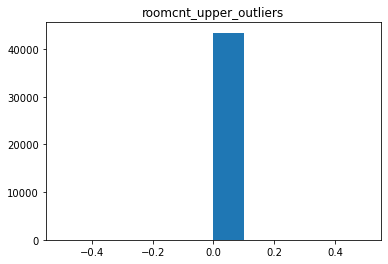

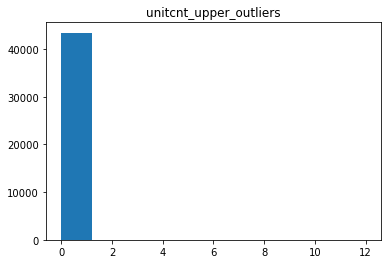

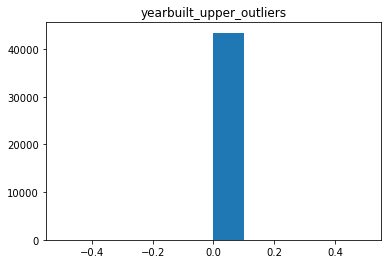

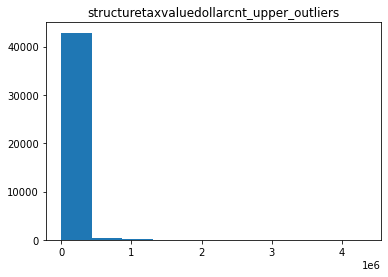

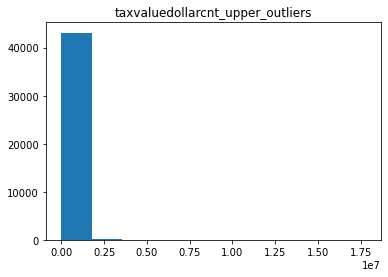

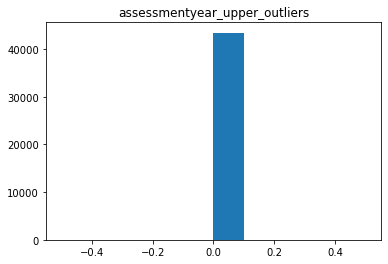

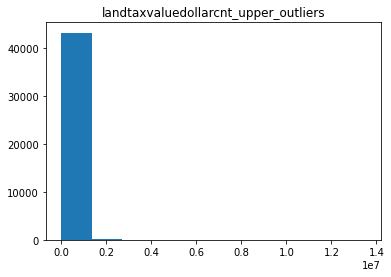

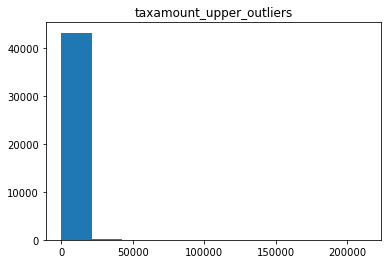

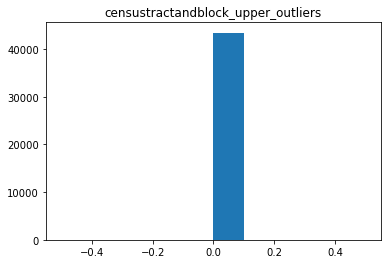

In [15]:
for col in df:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

- most of the logerror occurs between -1 and 1
- transactiondate has spikes in activity early in the year and in the summer. There is less activity in December.
- bathrooms has a right skew. Most homes have less than 5 bathrooms.
- bedrooms has a right skew. Most homes have less than 7 bedrooms.
- most homes have a calculatedfinishedsquarefeet of less than 7000
- most homes have a lotsizesquarefeet of less than 10000
- yearbuilt has a left skew; more homes were built after 1940
- most homes have a tax amount of less than 50000 dollars

### Split the Data

In [16]:
train, validate, test = wrangle.split_data(df)

In [17]:
train.shape, validate.shape, test.shape

((26054, 60), (8685, 60), (8685, 60))

### Does log error differ based on zip code?

<AxesSubplot:xlabel='regionidzip', ylabel='logerror'>

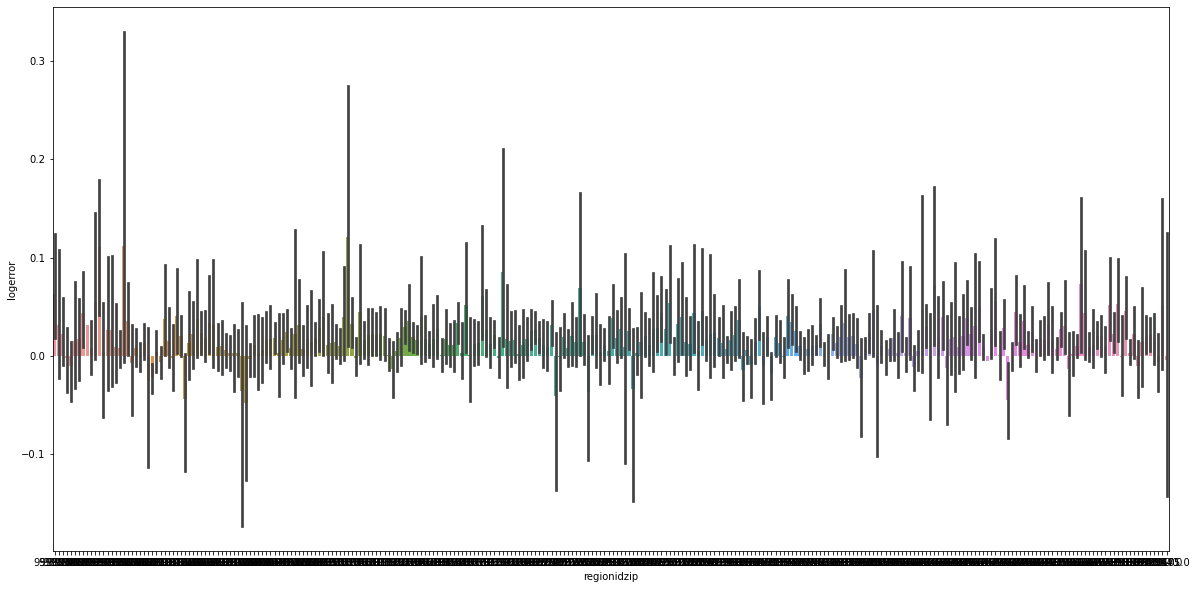

In [21]:
plt.figure(figsize=[20,10])
sns.barplot(x=train.regionidzip, y=train.logerror)

In [49]:
pd.DataFrame(train.regionidzip[train.logerror > 1]).max()

regionidzip    97344.0
dtype: float64

30

In [43]:
stats.levene(train.logerror[train.regionidzip==97344.0], 
             train.logerror[train.regionidzip!=97344.0])

LeveneResult(statistic=0.8685230631689544, pvalue=0.351373148174277)

In [44]:
stats.ttest_1samp(train.logerror[train.regionidzip==97344.0], 
             train.logerror[train.regionidzip!=97344.0])

Ttest_1sampResult(statistic=21820    0.891778
17137    1.554044
75842    3.928689
53839    4.946489
77524    1.864540
           ...   
38017   -0.057536
21247    1.238260
24199    0.456335
38550    1.603246
36986    0.310987
Name: logerror, Length: 26024, dtype: float64, pvalue=array([3.79851923e-01, 1.31020519e-01, 4.85375773e-04, ...,
       6.51548444e-01, 1.19717911e-01, 7.58034649e-01]))